Python Imaging Library
=====================

Notebook based on the tutorial of the [Python Imaging Library Handbook]

[Python Imaging Library Handbook]: http://effbot.org/imagingbook/pil-index.htm


In [55]:
from matplotlib.pyplot import *
%matplotlib notebook
from PIL import Image

The test image `lena.ppm` is required. It is available at <https://homepages.cae.wisc.edu/~ece533/images/>.  
Download it and put it in the `images` directory.

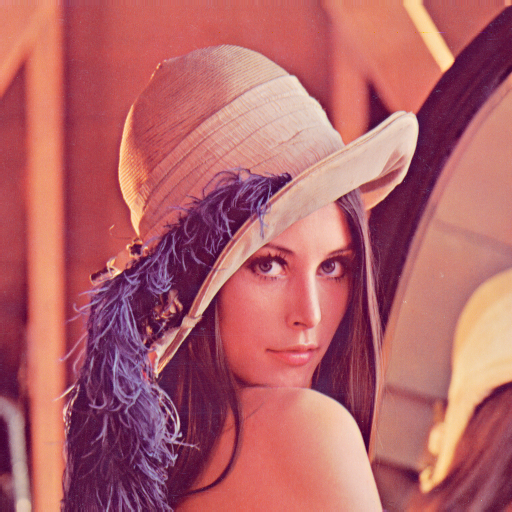

In [56]:
im = Image.open("images/lena.ppm")
im

In [57]:
# test online image
#im_online = Image.open("https://homepages.cae.wisc.edu/~ece533/images/lena.ppm")

In [58]:
512-128


384

In [59]:
print(im.format, im.size, im.mode)

PPM (512, 512) RGB


In [60]:
left = 128
upper = 128
right = 512 - 128
lower = 512 - 128

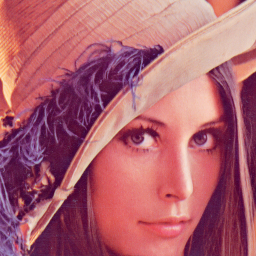

In [61]:
im.crop((left, upper, right, lower))

In [62]:
from ipywidgets import interact
@interact(left=fixed(0), upper=fixed(0), right=256, lower=256)
def crop(left, upper, right, lower):
    return im.crop((left, upper, right, lower))


interactive(children=(IntSlider(value=256, description='right', max=768, min=-256), IntSlider(value=256, description='lower', max=768, min=-256), Output()), _dom_classes=('widget-interact',))

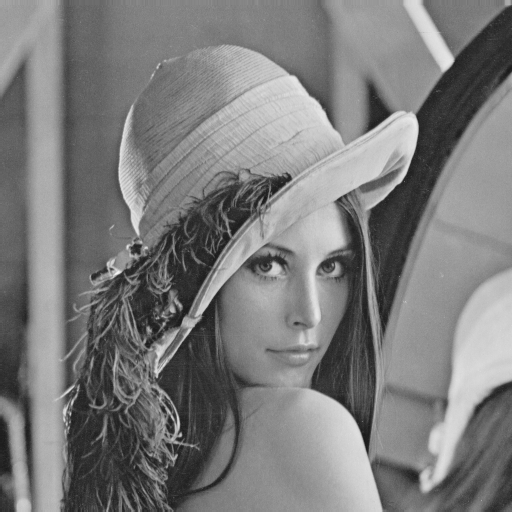

In [63]:
im.convert("L")

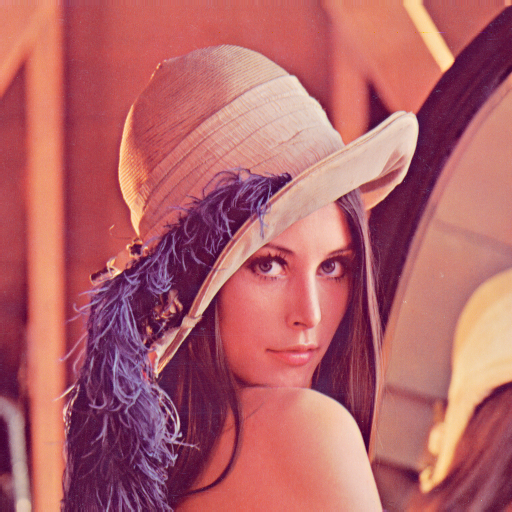

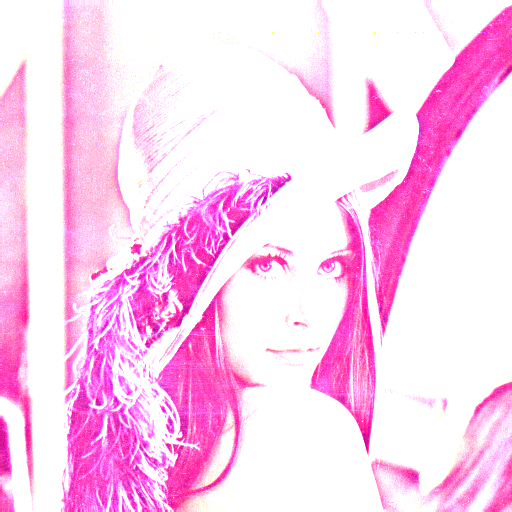

In [64]:
def f(factor):
    return im.point(lambda i: i * factor)

#interact(f, factor=IntSlider(min=0.0,max=2.0,step=0.1,value=1.0))

display(f(1.0))
f(3.0)

In [65]:
fi = interact(f, factor=1.0)

interactive(children=(FloatSlider(value=1.0, description='factor', max=3.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

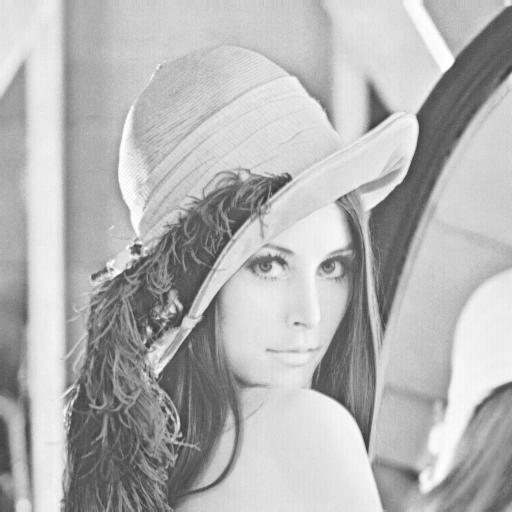

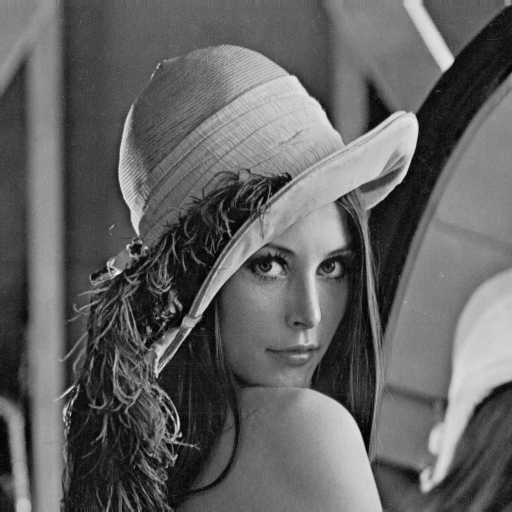

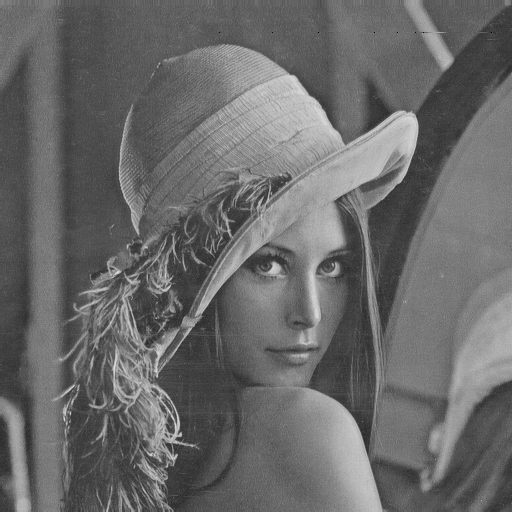

In [66]:
R, G, B = im.split()
display(R)
display(G)
display(B)

'RGB'

<IPython.core.display.Javascript object>


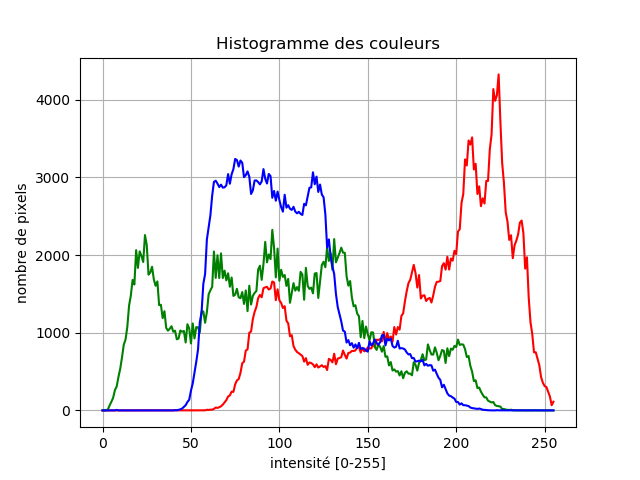

In [67]:
display(im.mode)
R, G, B = im.split()
Rh = R.histogram()
Gh = G.histogram()
Bh = B.histogram()
plot(Rh, "r")
plot(Gh, "g")
plot(Bh, "b")
ylabel("nombre de pixels")
xlabel("intensité [0-255]")
title("Histogramme des couleurs")
grid(True)

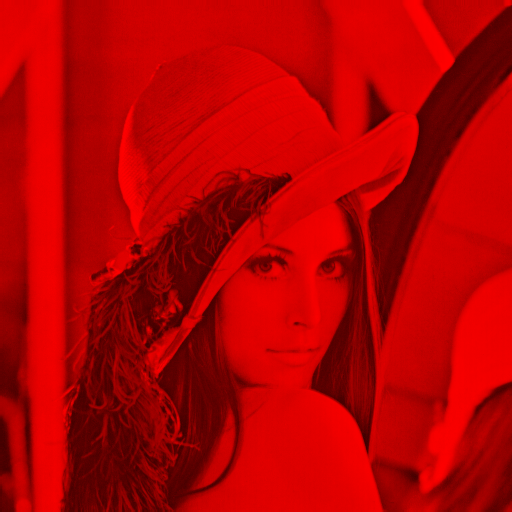

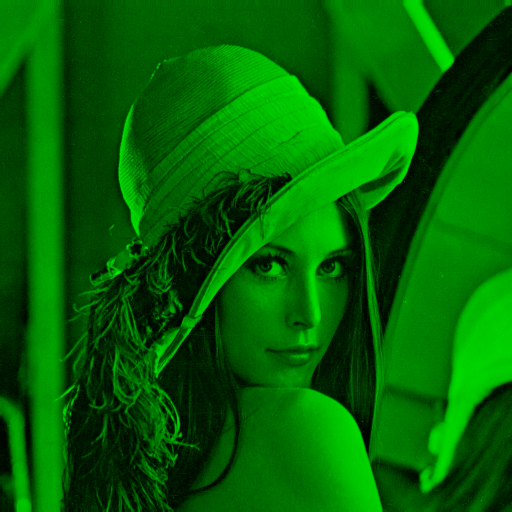

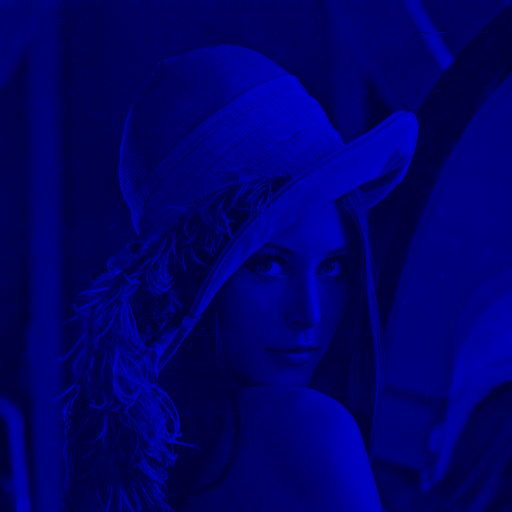

In [73]:
Z = R.point(lambda i: 0)
display(Image.merge("RGB", (R, Z, Z)))
display(Image.merge("RGB", (Z, G, Z)))
display(Image.merge("RGB", (Z, Z, B)))

